In [1]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Data_Cleaning import 
Dataset = pd.read_csv("Datasets/Final_Cleaned")

# Create a data frame
Dataset.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0


In [3]:
# Comparing "Race" compared to sleep constants

# Sleep constants: "Sleep Hours Week/Workdays", "Sleep Hours Weekends"

Race_update = Dataset.drop(columns=['Number of Rx Meds', 'Gender', 'Age at Screening', 'Educational Attainment',
                                     'Family Income to Poverty Ratio', 'Minutes of Vigorous Work Daily',	
                                     'Minutes of Moderate Work Daily', 'Minutes of Sedentary Activity Daily'
    
                     ])
Race_update

,Respondent ID,Race,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,6.0,60.0,30.0,7.5,8.0,2.0,0.0
4,109267.0,2.0,90.0,NaN,8.0,8.0,2.0,2.0
...,...,...,...,...,...,...,...,...
15555,124818.0,4.0,NaN,NaN,6.0,7.0,2.0,2.0
15556,124819.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821.0,4.0,NaN,NaN,8.0,9.0,2.0,2.0


In [4]:
Race_update.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Respondent ID                         15560 non-null  float64
 1   Race                                  15560 non-null  float64
 2   Minutes of Vigorous Recreation Daily  2417 non-null   float64
 3   Minutes of Moderate Recreation Daily  3893 non-null   float64
 4   Sleep Hours Week/Workdays             10105 non-null  float64
 5   Sleep Hours Weekends                  10099 non-null  float64
 6   Told Doctor About Sleep Issues        10195 non-null  float64
 7   Feeling Tired During Day Frequency    10195 non-null  float64
dtypes: float64(8)
memory usage: 972.6 KB


In [5]:

percent_missing = Race_update.isnull().sum() * 100 / len(Race_update)
missing_value_df = pd.DataFrame({'column_name': Race_update.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Respondent ID,Respondent ID,0.000000
Race,Race,0.000000
Told Doctor About Sleep Issues,Told Doctor About Sleep Issues,34.479434
Feeling Tired During Day Frequency,Feeling Tired During Day Frequency,34.479434
Sleep Hours Week/Workdays,Sleep Hours Week/Workdays,35.057841
Sleep Hours Weekends,Sleep Hours Weekends,35.096401
Minutes of Moderate Recreation Daily,Minutes of Moderate Recreation Daily,74.980720
Minutes of Vigorous Recreation Daily,Minutes of Vigorous Recreation Daily,84.466581


In [6]:
# Something to consider: A lot of missing data for moderate and vigorous recreation minutes

In [7]:
race_dict = {
    1.0 : "Mex-Am",
    2.0 : "Other Hisp",
    3.0 : "White",
    4.0 : "Black", 
    6.0 : "Asian",
    7.0 : "Other/Multi",
    
}
Race_update["Race"] = Race_update["Race"].map(race_dict)
Race_update.head()

,Respondent ID,Race,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,Asian,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,Mex-Am,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,White,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,Asian,60.0,30.0,7.5,8.0,2.0,0.0
4,109267.0,Other Hisp,90.0,NaN,8.0,8.0,2.0,2.0


In [8]:
# Create a dataframe for columns based on race
race_and_sleep = Race_update.groupby("Race").mean()
race_and_sleep

,Respondent ID,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
Race,,,,,,,
Asian,117060.086081,68.870523,54.969091,7.634726,8.349713,1.865416,1.331158
Black,117079.997072,100.579365,75.243469,7.435119,8.207437,1.753073,1.715829
Mex-Am,117131.481407,108.572755,61.682578,7.738174,8.802248,1.806291,1.683775
Other Hisp,117064.969560,84.814815,65.766484,7.649408,8.565945,1.710244,1.665366
Other/Multi,116972.621197,80.867769,77.652850,7.593870,8.357692,1.667932,1.990512
White,116981.215898,68.850746,66.332624,7.770332,8.272766,1.673099,1.982123


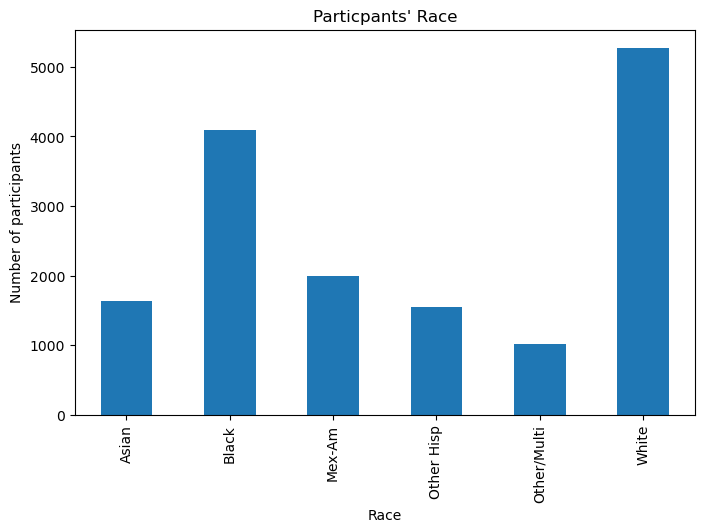

<Figure size 640x480 with 0 Axes>

In [9]:
# Group the levels of edu together to later compare with activity level

group_race = Race_update.groupby('Race')
count_types = group_race['Race'].count()

count_types

barchart_race =  count_types.plot(kind='bar', figsize=(8,5))
barchart_race.set_title("Particpants' Race")
barchart_race.set_xlabel("Race")
barchart_race.set_ylabel("Number of participants")
plt.show()
plt.tight_layout()


In [10]:
Race_update.columns

Index(['Respondent ID', 'Race', 'Minutes of Vigorous Recreation Daily',
       'Minutes of Moderate Recreation Daily', 'Sleep Hours Week/Workdays',
       'Sleep Hours Weekends', 'Told Doctor About Sleep Issues',
       'Feeling Tired During Day Frequency'],
      dtype='object')

In [11]:
cols = list(Race_update.columns)

Text(0, 0.5, 'Feeling tired throughout the day')

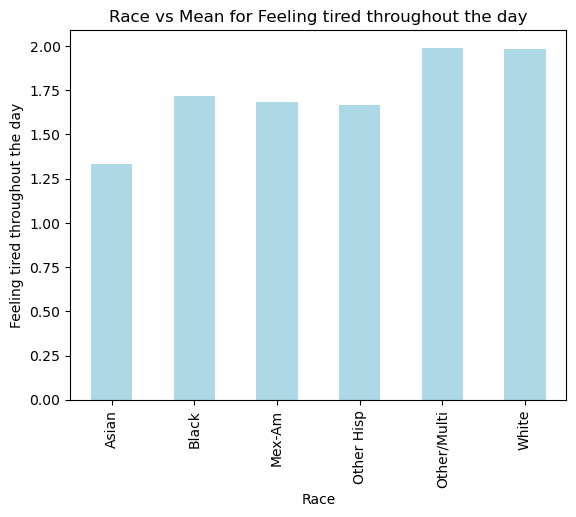

In [37]:
#Practice
Race_update[cols].groupby("Race").mean()["Feeling Tired During Day Frequency"].plot(kind="bar", color='lightblue')
plt.title("Race vs Mean for Feeling tired throughout the day")
plt.ylabel("Feeling tired throughout the day")

In [14]:
full_group1 = Race_update[Race_update["Told Doctor About Sleep Issues"].apply(lambda x: x in [1.0, 2.0])].groupby(["Race", "Told Doctor About Sleep Issues"]).mean()
full_group1

Respondent ID  \
Race        Told Doctor About Sleep Issues                  
Asian       1.0                             117273.805714   
            2.0                             117107.871306   
Black       1.0                             117019.716374   
            2.0                             117159.654154   
Mex-Am      1.0                             116981.410256   
            2.0                             117076.998973   
Other Hisp  1.0                             117092.282828   
            2.0                             117087.096154   
Other/Multi 1.0                             117000.725275   
            2.0                             116886.956395   
White       1.0                             117012.083190   
            2.0                             117053.692699   

                                            Minutes of Vigorous Recreation Daily  \
Race        Told Doctor About Sleep Issues                                         
Asian       1.0                                                        64.555556   
            2.0                                                        69.481132   
Black       1.0                                                        68.368852   
            2.0                                                       108.314961   
Mex-Am      1.0                                                       246.491228   
            2.0                                                        79.018797   
Other Hisp  1.0                                                        73.437500   
            2.0                                                        87.615385   
Other/Multi 1.0                                                        67.972973   
            2.0                                                        86.547619   
White       1.0                                                        68.968421   
            2.0                                                        68.809872   

                                            Minutes of Moderate Recreation Daily  \
Race        Told Doctor About Sleep Issues                                         
Asian       1.0                                                        55.180556   
            2.0                                                        55.010482   
Black       1.0                                                        63.226923   
            2.0                                                        79.775862   
Mex-Am      1.0                                                        62.000000   
            2.0                                                        61.589506   
Other Hisp  1.0                                                        55.353535   
            2.0                                                        69.656604   
Other/Multi 1.0                                                        78.629032   
            2.0                                                        77.190840   
White       1.0                                                        64.971239   
            2.0                                                        67.013584   

                                            Sleep Hours Week/Workdays  \
Race        Told Doctor About Sleep Issues                              
Asian       1.0                                              7.347701   
            2.0                                              7.684689   
Black       1.0                                              7.306428   
            2.0                                              7.475745   
Mex-Am      1.0                                              7.663090   
            2.0                                              7.756173   
Other Hisp  1.0                                              7.506897   
            2.0                                              7.706492   
Other/Multi 1.0                                              7.535912   
            2.0                 

<Figure size 600x400 with 0 Axes>

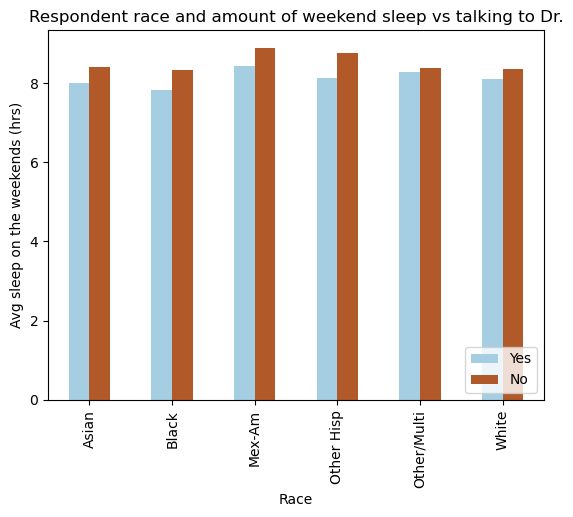

<Figure size 600x400 with 0 Axes>

In [31]:
full_group1[["Sleep Hours Weekends"]].unstack()['Sleep Hours Weekends'].rename(columns ={1.0:"Yes",2.0:"No"}).plot(kind="bar", colormap='Paired')
plt.title("Respondent race and amount of weekend sleep vs talking to Dr.")
plt.legend(loc= "lower right")
plt.ylabel("Avg sleep on the weekends (hrs)")
plt.figure(figsize = (6, 4))

<Figure size 600x400 with 0 Axes>

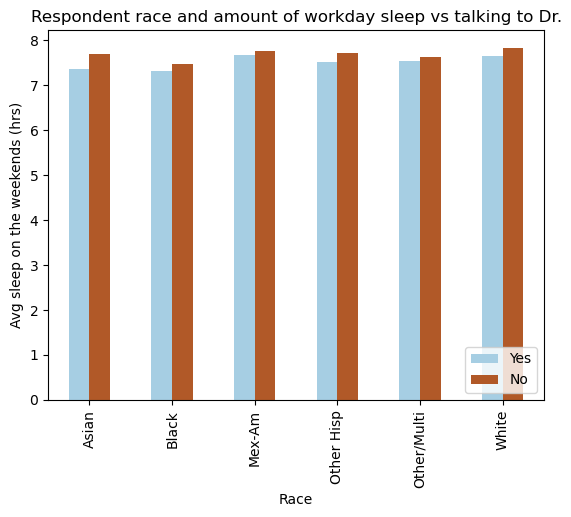

<Figure size 600x400 with 0 Axes>

In [32]:
full_group1[["Sleep Hours Week/Workdays"]].unstack()['Sleep Hours Week/Workdays'].rename(columns ={1.0:"Yes",2.0:"No"}).plot(kind="bar", colormap='Paired')
plt.title("Respondent race and amount of workday sleep vs talking to Dr.")
plt.legend(loc= "lower right")
plt.ylabel("Avg sleep on the weekends (hrs)")
plt.figure(figsize = (6, 4))

<Figure size 600x400 with 0 Axes>

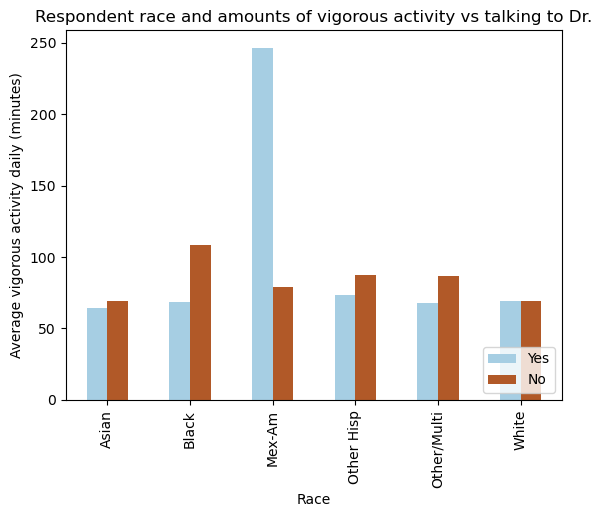

<Figure size 600x400 with 0 Axes>

In [34]:
full_group1[["Minutes of Vigorous Recreation Daily"]].unstack()['Minutes of Vigorous Recreation Daily'].rename(columns ={1.0:"Yes",2.0:"No"}).plot(kind="bar", colormap='Paired')
plt.title("Respondent race and amounts of vigorous activity vs talking to Dr.")
plt.legend(loc= "lower right")
plt.ylabel("Average vigorous activity daily (minutes)")
plt.figure(figsize = (6, 4))

In [18]:
# Create a simplified dataframe for essential topics when comparing race and sleep patterns.
group1_feel = Race_update.groupby("Race", group_keys=True)[['Feeling Tired During Day Frequency','Sleep Hours Week/Workdays', 'Sleep Hours Weekends']].apply(lambda x: x)
group1_feel
 


Feeling Tired During Day Frequency  Sleep Hours Week/Workdays  \
Race                                                                         
Asian 0                                     NaN                        NaN   
      3                                     0.0                        7.5   
      23                                    2.0                        8.5   
      28                                    0.0                       11.0   
      34                                    0.0                        8.0   
...                                         ...                        ...   
White 15536                                 1.0                        8.5   
      15541                                 NaN                        NaN   
      15545                                 4.0                        7.5   
      15548                                 1.0                        8.0   
      15557                                 NaN                        NaN   

             Sleep Hours Weekends  
Race                               
Asian 0                       NaN  
      3                       8.0  
      23                      9.0  
      28                     10.0  
      34                      8.0  
...                           ...  
White 15536                   8.5  
      15541                   NaN  
      15545                   7.5  
      15548                   8.0  
      15557                   NaN  

[15560 rows x 3 columns]

In [19]:
# Create a dataframe regarding notifying a doctor about tiredness amongst different races.

group2_feel = Race_update.groupby("Race", group_keys=True)[['Told Doctor About Sleep Issues', 'Feeling Tired During Day Frequency']].apply(lambda x: x)
group2_feel

Told Doctor About Sleep Issues  \
Race                                          
Asian 0                                 NaN   
      3                                 2.0   
      23                                2.0   
      28                                1.0   
      34                                2.0   
...                                     ...   
White 15536                             2.0   
      15541                             NaN   
      15545                             1.0   
      15548                             2.0   
      15557                             NaN   

             Feeling Tired During Day Frequency  
Race                                             
Asian 0                                     NaN  
      3                                     0.0  
      23                                    2.0  
      28                                    0.0  
      34                                    0.0  
...                                         ...  
White 15536                                 1.0  
      15541                                 NaN  
      15545                                 4.0  
      15548                                 1.0  
      15557                                 NaN  

[15560 rows x 2 columns]

In [21]:
#Generate a scatter plot of largest race group (White) vs. their weekday sleep length

avg_weekday_sleep = Race_update["Sleep Hours Week/Workdays"].mean()
print(avg_weekday_sleep) 

avg_weekend_sleep = Race_update["Sleep Hours Weekends"].mean()
print(avg_weekend_sleep) 



7.6409203364670955
8.361768491929894


In [24]:
Base_Race_stats = Race_update.drop(columns=['Minutes of Vigorous Recreation Daily',
       'Minutes of Moderate Recreation Daily'])
Base_Race_stats.head()


,Respondent ID,Race,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,Asian,NaN,NaN,NaN,NaN
1,109264.0,Mex-Am,NaN,NaN,NaN,NaN
2,109265.0,White,NaN,NaN,NaN,NaN
3,109266.0,Asian,7.5,8.0,2.0,0.0
4,109267.0,Other Hisp,8.0,8.0,2.0,2.0


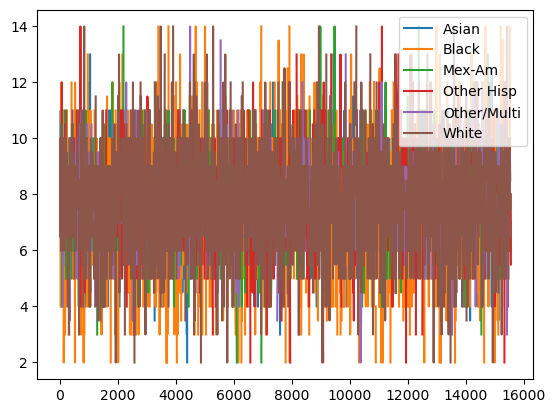

In [25]:
Base_Race_stats.groupby('Race')['Sleep Hours Week/Workdays'].plot(legend=True)
plt.show()

In [26]:
# Analysis: White respondents overwhelming average 6-10 hours of sleep on work days when compared to other races.

In [28]:
Base_Race_stats

,Respondent ID,Race,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,Asian,NaN,NaN,NaN,NaN
1,109264.0,Mex-Am,NaN,NaN,NaN,NaN
2,109265.0,White,NaN,NaN,NaN,NaN
3,109266.0,Asian,7.5,8.0,2.0,0.0
4,109267.0,Other Hisp,8.0,8.0,2.0,2.0
...,...,...,...,...,...,...
15555,124818.0,Black,6.0,7.0,2.0,2.0
15556,124819.0,Black,NaN,NaN,NaN,NaN
15557,124820.0,White,NaN,NaN,NaN,NaN
15558,124821.0,Black,8.0,9.0,2.0,2.0
